In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# LogisticRegression feature selection

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()
print(list(wine.target_names))
print(wine.data)
wine.target[ wine.target ==0 ] = 1 # we use only two classes 
print(wine.target)

['class_0', 'class_1', 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split( wine.data, wine.target, stratify = wine.target, random_state=42)
print(X_train.shape)

(133, 13)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.992
Test set score: 0.978


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.978


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [6]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))

print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.917
Test set score: 0.956


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

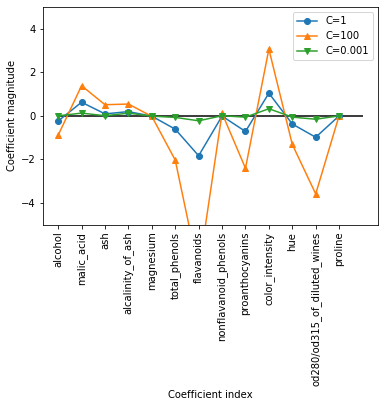

In [7]:
plt.plot(logreg.coef_.T, 'o-', label="C=1")
plt.plot(logreg100.coef_.T, '^-', label="C=100")
plt.plot(logreg001.coef_.T, 'v-', label="C=0.001")
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.hlines(0, 0, wine.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [8]:
logreg.coef_

array([[-2.37923182e-01,  6.25245218e-01,  9.00719786e-02,
         1.94620918e-01, -1.52206201e-02, -6.13688589e-01,
        -1.83567688e+00, -1.11609026e-02, -7.18877913e-01,
         1.04191462e+00, -3.76368122e-01, -9.85041311e-01,
         3.36360312e-04]])

In [9]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    print(lr_l1.coef_.T)

[[ 0.00772086]
 [ 0.02745932]
 [ 0.00257563]
 [ 0.04024602]
 [-0.00599647]
 [-0.01617292]
 [-0.03512403]
 [ 0.00227886]
 [-0.01319112]
 [ 0.07081856]
 [-0.00795962]
 [-0.027232  ]
 [-0.00212781]]
[[-2.37923182e-01]
 [ 6.25245218e-01]
 [ 9.00719786e-02]
 [ 1.94620918e-01]
 [-1.52206201e-02]
 [-6.13688589e-01]
 [-1.83567688e+00]
 [-1.11609026e-02]
 [-7.18877913e-01]
 [ 1.04191462e+00]
 [-3.76368122e-01]
 [-9.85041311e-01]
 [ 3.36360312e-04]]
[[-0.88964339]
 [ 1.38462727]
 [ 0.51130396]
 [ 0.54185421]
 [-0.02367829]
 [-2.03501298]
 [-7.14362239]
 [ 0.12210959]
 [-2.41158044]
 [ 3.06710984]
 [-1.31479953]
 [-3.59087653]
 [ 0.00805034]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

* Jeśli chcemy mieć bardziej interpretowalny model, może pomóc regulacja L1, ponieważ ogranicza on model do korzystania tylko z kilku współrzędnych. 

* Oto wykres współczynników i dokładności klasyfikacji dla regulacji L1:

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

Training accuracy of l1 logreg with C=0.001: 0.73
Test accuracy of l1 logreg with C=0.001: 0.73
Training accuracy of l1 logreg with C=1.000: 1.00
Test accuracy of l1 logreg with C=1.000: 0.98
Training accuracy of l1 logreg with C=100.000: 1.00
Test accuracy of l1 logreg with C=100.000: 0.98


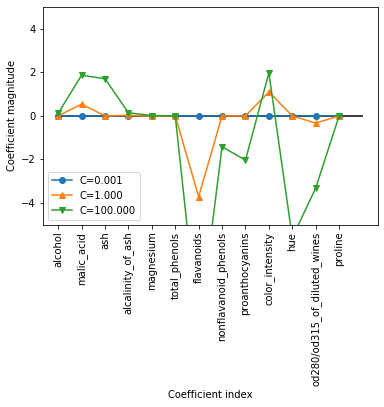

In [11]:
for C, marker in zip([0.001, 1, 100], ['o-', '^-', 'v-']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.hlines(0, 0, wine.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

In [13]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print(lr_l1.coef_.T)

[[ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [-0.0014004]]
[[ 0.00000000e+00]
 [ 5.42217890e-01]
 [ 0.00000000e+00]
 [ 1.78118913e-02]
 [-1.39767058e-02]
 [ 0.00000000e+00]
 [-3.72413160e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.09969387e+00]
 [ 0.00000000e+00]
 [-3.29688633e-01]
 [-7.57743895e-04]]
[[ 7.52123649e-02]
 [ 2.04818537e+00]
 [ 8.47985237e-01]
 [ 2.34564286e-01]
 [ 1.26030733e-02]
 [-2.92215366e-02]
 [-1.08502513e+01]
 [-1.25171501e+00]
 [-1.94366510e+00]
 [ 2.14213970e+00]
 [-4.86067050e+00]
 [-3.65335061e+00]
 [ 2.04818849e-03]]
